# NLP and Nutition Information
This notebook is used to get nutrition information such as Fat, Calories, Sugar, Carbohydrates, and Protein.

In [33]:
# import dependencies
import pandas as pd
import numpy as np
import re
from re import search
from fractions import Fraction
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import dependencies
import requests
import json


In [34]:
# import the raw csv
recipes_df_raw = pd.read_csv('../static/data/technical_list.csv', encoding="utf-8")
recipes_df = recipes_df_raw.copy()
recipes_df_raw.head()

,title,judge,makes,difficulty,hands_on_time,baking_time,ingredients,recipe_image,judge_image
0,Rav Gill’s Macaron Snack-Cessories,Ravneet Gill,8,Needs skill,50 mins,30 mins,"[<h5>For the macarons:</h5>, <p>150g ground al...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
1,Liam Charles’s Biscuit Card Tower & Deck of Cards,Liam Charles,12,Needs skill,45 mins,15 mins,"[<h5>For the gingerbread:</h5>, <p>225g plain ...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
2,Rav Gill’s Cherry & Almond Deco Roll,Ravneet Gill,6,Needs skill,50 mins,10 mins,"[<h5>For the filling:</h5>, <p>2 tsp powdered ...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
3,Liam Charles’s Yorkshire Pudding Wraps,Liam Charles,2,Needs skill,25 mins,30 mins,"[<h5>For the batter:</h5>, <p>100g plain flour...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
4,Rav Gill’s Churros with Banana Butterscotch,Ravneet Gill,6,Needs skill,30 mins,25 mins,"[<h5>For the churros:</h5>, <p>20g caster suga...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...


In [49]:
# import the raw csv
signature_df_raw = pd.read_csv('../static/data/signature_list.csv', encoding="utf-8")
signature_df = signature_df_raw.copy()
signature_df.head()

,title,judge,makes,difficulty,hands_on_time,baking_time,ingredients,recipe_image,judge_image
0,Rahul’s Spiced Apple & Plum Nut Crumble with O...,Rahul,8,Needs skill,"2 hrs, plus freezing",35 mins,"[<h5>For the ice cream:</h5>, <p>340ml whole m...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
1,Nancy’s Caribbean Crumble with Lime-crusted Co...,Nancy,6,Easy,1 hr,30 mins,"[<h5>For the coconut ice cream:</h5>, <p>2 lar...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
2,"Rosie’s Date, Cranberry & Mace Panettones",Rosie,6,Needs skill,2 hrs,45 mins,"[<h5>For the panettone dough:</h5>, <p>410g ex...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
3,"Ruby’s Boozy Chai, Cherry & Chocolate Panettones",Ruby,16-18,Needs skill,"1 hr, plus rising",25 mins,"[<h5>For the soaked fruits:</h5>, <p>200ml alm...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
4,Dave’s Caramel Latte Custard Slices,Dave,8,Needs skill,1 hr 30 mins,35 mins,"[<h5>For the rough puff pastry:</h5>, <p>280g ...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...


In [36]:
# import the raw csv
showstopper_df_raw = pd.read_csv('../static/data/signature_list.csv', encoding="utf-8")
showstopper_df = showstopper_df_raw.copy()
showstopper_df.head()

,title,judge,makes,difficulty,hands_on_time,baking_time,ingredients,recipe_image,judge_image
0,Rahul’s Spiced Apple & Plum Nut Crumble with O...,Rahul,8,Needs skill,"2 hrs, plus freezing",35 mins,"[<h5>For the ice cream:</h5>, <p>340ml whole m...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
1,Nancy’s Caribbean Crumble with Lime-crusted Co...,Nancy,6,Easy,1 hr,30 mins,"[<h5>For the coconut ice cream:</h5>, <p>2 lar...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
2,"Rosie’s Date, Cranberry & Mace Panettones",Rosie,6,Needs skill,2 hrs,45 mins,"[<h5>For the panettone dough:</h5>, <p>410g ex...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
3,"Ruby’s Boozy Chai, Cherry & Chocolate Panettones",Ruby,16-18,Needs skill,"1 hr, plus rising",25 mins,"[<h5>For the soaked fruits:</h5>, <p>200ml alm...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...
4,Dave’s Caramel Latte Custard Slices,Dave,8,Needs skill,1 hr 30 mins,35 mins,"[<h5>For the rough puff pastry:</h5>, <p>280g ...",https://thegreatbritishbakeoff.co.uk/wp-conten...,https://thegreatbritishbakeoff.co.uk/wp-conten...


In [37]:
# Formats for ingredients
# 1g unsalted butter
# 1 tsp vanilla extract
# slivered pistachios
# 2 large eggs
# 2 dill pickles, quartered lengthways
# juice of 1/2 lemon

def split_ingredient(ingredient):
    '''
    The split_ingredients funcion takes an ingredient in a string format i.e. 10g sugar. The function then splits the ingredient into quantity, measurement, and any comments like temperature, or preparation.
    '''
    # create variable defaults
    comment = 'na'
    quantity = '0'
    measurement = 'na'
    item = 'na'

    # if the ingredient contains a comment
    if ',' in ingredient:
        comment = ingredient.split(',')[1]
        ingredient = ingredient.split(',')[0]

    # if measurement is weight or volume (works for g or ml)
    if re.match('^\d+[a-zA-Z]',ingredient) is not None:
        quantity = re.findall('\d+', ingredient)[0]
        measurement = re.findall('^\d+([a-zA-Z]+) ', ingredient)[0]
        item = re.findall('\d+[a-zA-Z]+ (.*)', ingredient)[0]

    # if ingredient is eggs
    elif 'egg' in ingredient:
        quantity = re.findall('\d+', ingredient)[0]
        measurement = re.findall('\d+(.*) ', ingredient)[0]
        item = 'egg'

    # Juice of
    elif 'juice of' in ingredient:
        item = re.findall('juice of [^a-z]+([a-z ]+)', ingredient, re.IGNORECASE)[0]
        if 'zest' in ingredient:
            comment = 'juice and zest'
        else:
            comment = 'juice'
        if re.findall('[0-9]+', ingredient) is not None:
            quantity = re.findall('[0-9]+', ingredient)[0]
        else:
            quantity = '1'


    # if ingredient uses tsp or tbsp
    elif 'tbsp' in ingredient: 
        try:
            quantity = re.findall('^([0-9]+/*[0-9]*)', ingredient)[0]
        except IndexError:
            quantity = "0.5"
        measurement = 'tbsp'
        item = re.findall('tbsp (.*)', ingredient)[0]

    elif 'tsp' in ingredient:
        try:
            quantity = re.findall('^([0-9]+/*[0-9]*)', ingredient)[0]
        except IndexError:
            quantity = "0.5"
        measurement = 'tsp'
        item = re.findall('tsp (.*)', ingredient)[0]
    
    # if it just a number and ingredient (2 pickles)
    elif re.match('^[0-9]+/*[0-9]* ', ingredient) is not None:
        quantity = re.findall('^([0-9]+/*[0-9]*)', ingredient)[0]
        measurement = "whole"
        item = re.findall('^[0-9]+/*[0-9]* (.*)', ingredient)[0]
    
    # a pinch of something
    elif search('pinch', ingredient) is not None:
        measurement = re.findall('(.*pinch)', ingredient)[0]
        item = re.findall('.*pinch of (.*)', ingredient)[0]
        if re.match('^[0-9]', ingredient) is not None:
            quantity = re.findall('^([0-9])', ingredient)[0]

    # Other
    else:
        comment = "Could not parse ingredient"
        # format into dict
        ingredient_list_split = {'quantity':quantity, 'measurement':measurement, 'ingredient':ingredient,'comment':item}
        return ingredient_list_split

    # make sure the quantity is the right data type
    if '/' in quantity:
        quantity = Fraction(quantity)
    
    # format into dict
    ingredient_list_split = {'quantity':float(quantity), 'measurement':measurement, 'ingredient':item, 'comment':comment}
    
    return ingredient_list_split

In [38]:
def seperate_ingredients(ingredient_string):
    '''
    The seperate_ingredients funcion takes an ingredient list with each ingredient inside a <p></p> tag and returns a list containing all the ingredients in a string format.
    '''
    ingredient_list = re.findall('<p>(.*?)</p>', ingredient_string)
    
    return ingredient_list

In [39]:
# test of the split ingredient function
test_ingredient = '1/2 lime'
test_ingredient_split = (split_ingredient(test_ingredient))
test_item = test_ingredient_split['ingredient']
print(test_ingredient_split)

{'quantity': 0.5, 'measurement': 'whole', 'ingredient': 'lime', 'comment': 'na'}


In [40]:
# Technical bakes

# include only the judges from the show
judge_list = ['Mary Berry', 'Paul Hollywood', 'Prue Leith']
tech_rec_df = recipes_df[recipes_df['judge'].isin(judge_list)]
tech_rec_df.reset_index(inplace=True)

# dict to hold totals
total_ingredients = {}

# iterate through df
for rec_num in range(0,len(tech_rec_df.index)):


    # list to hold the output of the split
    split_ing_list = []

    # split the ingredient list
    split_ing_list = seperate_ingredients(tech_rec_df['ingredients'][rec_num])

    nlp_ingredients = []
    # for each ingredient split it using nlp
    for ingredient in split_ing_list:
        try:
            nlp_ingredients.append(split_ingredient(ingredient))
        except:
            print(f'Couldn\'t parse {ingredient}')
    
    # check if it has been added to ing_list
    for ing in nlp_ingredients:

        # if it has, add the quantity to quantity and increment the count
        if ing['ingredient'] in total_ingredients:
            try:
                quantity = ing['quantity']
                total_ingredients[ing['ingredient']]['quantity'] += quantity
                total_ingredients[ing['ingredient']]['count'] += 1
            except:
                print(f'Could not parse {ing}')
        # if it hasn't, create a new key in the dict
        else: 
            new_ing_dict = {'quantity': ing['quantity'], 'measurement':ing['measurement'], 'count':1,}
            total_ingredients[ing['ingredient']] = new_ing_dict

print(total_ingredients)


t': 3}, 'currants': {'quantity': 250.0, 'measurement': 'g', 'count': 2}, 'dried cranberries ': {'quantity': 100.0, 'measurement': 'g', 'count': 1}, 'mixed peel ': {'quantity': 50.0, 'measurement': 'g', 'count': 1}, 'Juice and finely grated zest of 1 large unwaxed orange': {'quantity': '0', 'measurement': 'na', 'count': 1}, 'brandy': {'quantity': 100.0, 'measurement': 'ml', 'count': 1}, 'molasses': {'quantity': 77.0, 'measurement': 'g', 'count': 2}, 'bicarbonate of soda': {'quantity': 3.0, 'measurement': 'tsp', 'count': 4}, 'walnuts': {'quantity': 160.0, 'measurement': 'g', 'count': 2}, 'unsalted butter ': {'quantity': 55.0, 'measurement': 'g', 'count': 1}, 'icing sugar ': {'quantity': 40.0, 'measurement': 'g', 'count': 1}, 'egg': {'quantity': 169.0, 'measurement': ' egg yolk', 'count': 68}, 'ground almonds': {'quantity': 254.0, 'measurement': 'g', 'count': 2}, 'icing sugar': {'quantity': 1124.0, 'measurement': 'g', 'count': 7}, 'almond extract ': {'quantity': 1.5, 'measurement': 'tsp',

In [47]:
# Showstopper Bakes
# iterate through df
for rec_num in range(0,len(showstopper_df.index)):


    # list to hold the output of the split
    split_ing_list = []

    # split the ingredient list
    split_ing_list = seperate_ingredients(showstopper_df['ingredients'][rec_num])

    nlp_ingredients = []
    # for each ingredient split it using nlp
    for ingredient in split_ing_list:
        try:
            nlp_ingredients.append(split_ingredient(ingredient))
        except:
            print(f'Couldn\'t parse {ingredient}')
    
    # check if it has been added to ing_list
    for ing in nlp_ingredients:

        # if it has, add the quantity to quantity and increment the count
        if ing['ingredient'] in total_ingredients:
            try:
                quantity = ing['quantity']
                total_ingredients[ing['ingredient']]['quantity'] += quantity
                total_ingredients[ing['ingredient']]['count'] += 1
            except:
                print(f'Could not parse {ing}')
        # if it hasn't, create a new key in the dict
        else: 
            new_ing_dict = {'quantity': ing['quantity'], 'measurement':ing['measurement'], 'count':1,}
            total_ingredients[ing['ingredient']] = new_ing_dict

print(total_ingredients)

ons': {'quantity': '0', 'measurement': 'na', 'count': 1}, 'very strong white bread flour': {'quantity': 500.0, 'measurement': 'g', 'count': 1}, 'ground paprika': {'quantity': 2.0, 'measurement': 'tsp', 'count': 1}, 'ground coriander': {'quantity': 3.0, 'measurement': 'tsp', 'count': 2}, 'crushed chilli flakes ': {'quantity': 1.0, 'measurement': 'tsp', 'count': 1}, 'extra-virgin coconut oil ': {'quantity': 30.0, 'measurement': 'ml', 'count': 1}, 'red food-colouring gel or paste': {'quantity': '0', 'measurement': 'na', 'count': 1}, 'handful of coriander leaves': {'quantity': '0', 'measurement': 'na', 'count': 1}, 'parsley': {'quantity': 10.0, 'measurement': 'g', 'count': 1}, 'rosemary needles': {'quantity': 10.0, 'measurement': 'g', 'count': 1}, 'diced smoked pancetta': {'quantity': 150.0, 'measurement': 'g', 'count': 1}, 'Gruyère cheese': {'quantity': 150.0, 'measurement': 'g', 'count': 1}, 'Grana Padano cheese': {'quantity': 100.0, 'measurement': 'g', 'count': 1}, 'rock salt': {'quanti

In [50]:
# Signature Bakes
# iterate through df
for rec_num in range(0,len(signature_df.index)):


    # list to hold the output of the split
    split_ing_list = []

    # split the ingredient list
    split_ing_list = seperate_ingredients(signature_df['ingredients'][rec_num])

    nlp_ingredients = []
    # for each ingredient split it using nlp
    for ingredient in split_ing_list:
        try:
            nlp_ingredients.append(split_ingredient(ingredient))
        except:
            print(f'Couldn\'t parse {ingredient}')
    
    # check if it has been added to ing_list
    for ing in nlp_ingredients:

        # if it has, add the quantity to quantity and increment the count
        if ing['ingredient'] in total_ingredients:
            try:
                quantity = ing['quantity']
                total_ingredients[ing['ingredient']]['quantity'] += quantity
                total_ingredients[ing['ingredient']]['count'] += 1
            except:
                print(f'Could not parse {ing}')
        # if it hasn't, create a new key in the dict
        else: 
            new_ing_dict = {'quantity': ing['quantity'], 'measurement':ing['measurement'], 'count':1,}
            total_ingredients[ing['ingredient']] = new_ing_dict

print(total_ingredients)

g white bread flour': {'quantity': 1000.0, 'measurement': 'g', 'count': 2}, 'ground paprika': {'quantity': 4.0, 'measurement': 'tsp', 'count': 2}, 'ground coriander': {'quantity': 6.0, 'measurement': 'tsp', 'count': 4}, 'crushed chilli flakes ': {'quantity': 2.0, 'measurement': 'tsp', 'count': 2}, 'extra-virgin coconut oil ': {'quantity': 60.0, 'measurement': 'ml', 'count': 2}, 'red food-colouring gel or paste': {'quantity': '00', 'measurement': 'na', 'count': 2}, 'handful of coriander leaves': {'quantity': '00', 'measurement': 'na', 'count': 2}, 'parsley': {'quantity': 20.0, 'measurement': 'g', 'count': 2}, 'rosemary needles': {'quantity': 20.0, 'measurement': 'g', 'count': 2}, 'diced smoked pancetta': {'quantity': 300.0, 'measurement': 'g', 'count': 2}, 'Gruyère cheese': {'quantity': 300.0, 'measurement': 'g', 'count': 2}, 'Grana Padano cheese': {'quantity': 200.0, 'measurement': 'g', 'count': 2}, 'rock salt': {'quantity': '00', 'measurement': 'na', 'count': 2}, 'lemon-infused olive 

In [51]:
#create data frame for the answer
ing_totals_df = pd.DataFrame()

#loop through the dict and add the values to a dict which is then appended to the df
for key in total_ingredients:
    item = key
    quantity = total_ingredients[key]['quantity']
    count = total_ingredients[key]['count']
    measurement = total_ingredients[key]['measurement']
    item_dict = {'item': item, 'quantity':quantity, 'count':count, 'measurement':measurement}
    ing_totals_df = ing_totals_df.append(item_dict, ignore_index=True)

In [52]:
# set the dtypes
ing_totals_df = ing_totals_df.astype({'quantity': 'int32', 'count':'int32', 'item':'string'})
# sort the values in decending order by total quantity
ing_totals_df.sort_values(by=['quantity'], ascending=False)


,count,item,measurement,quantity
0,103,plain flour,g,20667
29,143,unsalted butter,g,17515
28,32,strong white bread flour,g,14070
32,86,caster sugar,g,9961
130,41,plain flour,g,7767
...,...,...,...,...
207,3,finely grated zest of 1 lemon,na,0
588,2,about 2 litres of sunflower oil,na,0
209,1,finely grated zest of 1 small orange,na,0
211,1,table salt,pinch,0


In [53]:
# sort the values in decending order by count
ing_totals_df.sort_values(by=['count'], ascending=False)

,count,item,measurement,quantity
19,216,egg,egg yolk,537
29,143,unsalted butter,g,17515
0,103,plain flour,g,20667
36,89,salt,tsp,155
32,86,caster sugar,g,9961
...,...,...,...,...
209,1,finely grated zest of 1 small orange,na,0
208,1,packet orange jelly,g,135
205,1,fine semolina for dusting,na,0
204,1,chopped fresh sage,tsp,2


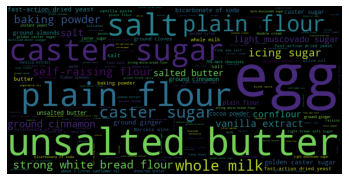

In [61]:
# creat dict with word and count
ing_count_dict = dict(zip(ing_totals_df['item'], ing_totals_df['count']))

# creating a word map with the dict
wordcloud = WordCloud(width = 800, height = 400, max_words=500,normalize_plurals=False).generate_from_frequencies(ing_count_dict)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [62]:
wordcloud.to_file("../static/images/ingredient_wordcloud.jpg")

In [45]:
# multiply by 6 to include the number of participants in the total
ing_totals_df['quantity * 6'] = ing_totals_df['quantity']*6
ing_totals_df['quantity * 6(lbs)'] = ing_totals_df['quantity * 6']*2.20462
# sort the values in decending order by count
ing_totals_df.sort_values(by=['count'], ascending=False)

,count,item,measurement,quantity,quantity * 6,quantity * 6(lbs)
19,68,egg,egg yolk,169,1014,2235.48468
29,45,unsalted butter,g,3645,21870,48215.03940
32,40,caster sugar,g,4535,27210,59987.71020
0,39,plain flour,g,6345,38070,83929.88340
36,33,salt,tsp,57,342,753.98004
...,...,...,...,...,...,...
120,1,mixed spice,tsp,1,6,13.22772
121,1,cider vinegar,ml,175,1050,2314.85100
127,1,wholemeal flour,g,125,750,1653.46500
129,1,cold water,ml,160,960,2116.43520


In [46]:
total_ingredients['salted butter']

{'quantity': 265.0, 'measurement': 'g', 'count': 2}